Sentiment Analysis, with NLTK and Hugging Face

1. VADER model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

plt.style.use('ggplot')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/martina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


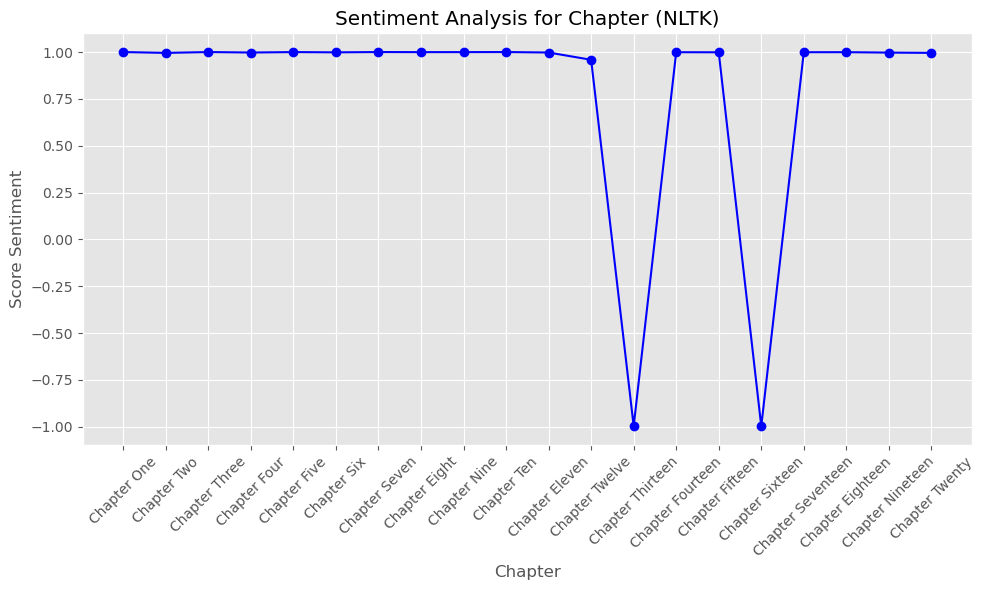

In [2]:
# Getting VADER lexicon
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def sentiment_nltk(csv_file):
    chapters = []
    nltk_scores = []

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            chapter = row['Chapter']
            content = row['Content']

            # Sentiment score for chapter
            sentiment = sia.polarity_scores(content)
            chapters.append(chapter)
            nltk_scores.append(sentiment['compound'])  

    return chapters, nltk_scores


# Plotting
def plot_nltk(chapters, sentiment_scores, title="Sentiment Analysis for Chapter (NLTK)"):
    plt.figure(figsize=(10, 6))
    plt.plot(chapters, sentiment_scores, marker='o', linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Chapter')
    plt.ylabel('Score Sentiment')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

chapters, sentiment_scores = sentiment_nltk('bell_jar_chapters.csv')
plot_nltk(chapters, sentiment_scores)

2. Roberta Model (transformers)

In [3]:
from transformers import pipeline

2024-10-17 18:20:56.278475: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/martina/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
# Function to split the text into chunks
def chunk_text(text, max_length=512):
    return [text[i:i + max_length] for i in range(0, len(text), max_length)]

In [6]:
def sentiment_roberta(csv_file):
    chapters = []
    roberta_scores = []

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            chapter = row['Chapter']
            content = row['Content']

        
            chunks = chunk_text(content, max_length=512)

            chunk_scores = []
            for chunk in chunks:
                result = sentiment_pipeline(chunk)
                score = result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score']
                chunk_scores.append(score)

            # Average score for each chapter
            average_score = np.mean(chunk_scores)
            chapters.append(chapter)
            roberta_scores.append(average_score)

    return chapters, roberta_scores


In [7]:
# Plotting
def plot_sentiment(chapters, roberta_scores, title="Sentiment Analysis for Chapter (Hugging Face)"):
    plt.figure(figsize=(10, 6))
    plt.plot(chapters, roberta_scores, marker='o', linestyle='-', color='g')
    plt.title(title)
    plt.xlabel('Chapter')
    plt.ylabel('Score')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
chapters, roberta_scores = sentiment_roberta('bell_jar_chapters.csv')

In [ ]:
plot_sentiment(chapters, roberta_scores)